<h1>Homework 8</h1>
<h2>By Danny Tran</h2>

<h1>Question 1</h1>
<h2>Classification Decision Trees, Differences in Statistical Modeling</h2>

In this portion, I discussed with ChatGPT about certain nuances about Classification Decision Trees to understand
the nuances of what makes a Classification Decision Tree good for predicting qualities of certain datapoints. The main
takeaways I had were that Classification Decision Trees group up certain statistical factors together and try to predict
based on a certain (limited) amount of seperation groupings. This is in contrast to Multiple Linear Regression for several reasons, most of which surround the difference between the nature of the data. Multiple Linear Regression works well with numerical data while Classification Decision Trees work best with categorical data. 

The discussion can be viewed here, with a summary provided near the end of the conversation.<br>
https://chatgpt.com/share/673dec74-1bf8-8000-8fd0-b2bb71d431f8

<h1>Question 2</h1>
<h2>Metric Analysis</h2>

ChatGPT gave a concise answer to my question, and I was able to understand easily why each of the metrics are important:<br>
<h3>Accuracy</h3>
Ideally, we want accuracy to be maximized and in an ideal world, it would be the choice for all cases to focus on accuracy.
However, this is not realistic. In the real world, there are incomplete/unpredictable sets of data that can be inaccurate in certain aspects. Accuracy encapsulates the ideal prediction metric, it makes both the positives and negatives fully important and is important when we need to know both contexts.<br>
The provided example is the Weather, whether it is storming or not storming, it is important to know either way, so we choose accruacy since both the positives and the negatives are relevant.

<h3>Sensitivity</h3>
Sensitivity measures the proportion of True Positives to the total number of Positives in a data set. This is especially important when we want to detect as many of the positives as possible. It is especially used when missing a positive case can result in major consequences. Focusing on sensitivity often result in an increase of False Positives.<br>
The provided example is with Health Care, such as cancer screenings. It is vital that all positive cases are detected more than the importance of bringing up a False Positive. We would rather tell a person they have cancer when they do not rather than dooming someone to die by not detecting their cancer.

<h3>Specificity</h3>
Sensitivity measures the proportion of True Negatives to the total number of Negatives in a data set. This is in inverse to Sensitivity, however specificity is used when we do not want to incorrectly flag a negative as a positive. This is often used when there is a significant cost to addressing positive cases. For example:<br>
The example I think is best deals with criminal cases. The mindset that you are Innocent until proven Guilty encapsulates Specificity, we would rather let a criminal free than wrongly jail an innocent person for years.

<h3>Precision</h3>
Precision works similarly to Sensitivity. It is the proportion of True Positives to detected Positives. However, instead of focusing on Negative cases that could be Positive, it moreso wants to ensure that any Positives you detect can reliably be positive, it focuses less on the repercussions of a false negative, and moreso on the reliability of a detected positive.<br>
The given example is fraud reports. When a bank flags a fraudster, it wants to make sure that it is not wasting resources on a false lead.

The discussion can be viewed here:
https://chatgpt.com/share/673df1e5-5f48-8000-8861-f9f2115c76db

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# create `ab_reduced_noNaN` based on the specs above

# Remove the specified columns
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop all remaining rows with NaN entries
ab = ab.dropna()

# Convert 'Pub year' and 'NumPages' to integers
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)

# Convert 'Hard_or_Paper' to a categorical type
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Display the first few rows and data types of the updated dataset
print(ab.head())
print(ab.info())


# Creating an 80-20 split for training and testing 

# Split the data into 80% training and 20% testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab, test_size=0.2
)

# Display the shapes of the resulting datasets
print(f"Training set shape: {ab_reduced_noNaN_train.shape}")
print(f"Testing set shape: {ab_reduced_noNaN_test.shape}")

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

In [2]:
from sklearn.tree import DecisionTreeClassifier

# Define X and y
y = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target variable: Hardback (binary)
X = ab[['List Price']]  # Feature variable: List Price

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the classifier with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2)

# Train the model using the training data (X_train and y_train)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Display the accuracy of the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Map binary predictions to readable class names
predicted_labels = ['Paperback' if pred == 0 else 'Hardback' for pred in y_pred]

# Combine predictions, List Price, and actual values into a DataFrame for better readability
output_df = pd.DataFrame({
    'List Price': X_test['List Price'].values,
    'Predicted': predicted_labels,
    'Actual': ['Paperback' if actual == 0 else 'Hardback' for actual in y_test]
})

# Display the first 10 rows of the comparison
print(output_df.head(10))


Accuracy: 0.88
   List Price  Predicted     Actual
0       17.00  Paperback  Paperback
1       86.95  Paperback  Paperback
2       17.00  Paperback  Paperback
3       14.95  Paperback  Paperback
4        5.99  Paperback  Paperback
5       14.95  Paperback  Paperback
6       21.99   Hardback  Paperback
7       14.99  Paperback  Paperback
8       14.00  Paperback  Paperback
9       14.95  Paperback  Paperback


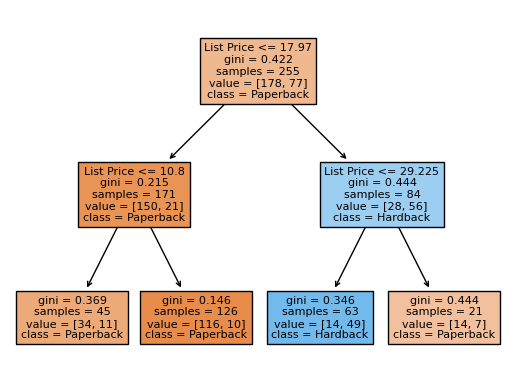

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the trained decision tree
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardback'])
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Define X and y
y_b = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target variable: Hardback (binary)
X_b = ab[['NumPages', 'Thick', 'List Price']]  # Feature variable: [['NumPages', 'Thick', 'List Price']]

# Split the data into training and test sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2)

# Initialize the classifier with a max depth of 2
clf2 = DecisionTreeClassifier(max_depth=2)

# Train the model using the training data (X_train_b and y_train_b)
clf2.fit(X_train_b, y_train_b)

# Make predictions on the test set
y_pred_b = clf2.predict(X_test_b)

# Display the accuracy of the model
accuracy_b = clf2.score(X_test_b, y_test_b)
print(f"Accuracy: {accuracy_b:.2f}")

# Map binary predictions to readable class names
predicted_labels_b = ['Paperback' if pred == 0 else 'Hardback' for pred in y_pred_b]

# Combine predictions, List Price, and actual values into a DataFrame for better readability
output_df_b = pd.DataFrame({
    'List Price': X_test_b['List Price'].values,
    'Thick': X_test_b['Thick'].values,
    'NumPages': X_test_b['NumPages'].values,
    'Predicted': predicted_labels_b,
    'Actual': ['Paperback' if actual == 0 else 'Hardback' for actual in y_test_b]
})

# Display the first 10 rows of the comparison
print(output_df_b.head(10))


Accuracy: 0.86
   List Price  Thick  NumPages  Predicted     Actual
0       13.99    0.2       129  Paperback  Paperback
1       15.95    1.4       672  Paperback  Paperback
2        6.99    0.9       320  Paperback  Paperback
3       14.95    0.9       256  Paperback  Paperback
4       17.99    1.5       400   Hardback   Hardback
5        7.99    1.1       416  Paperback  Paperback
6       13.83    1.0       480  Paperback   Hardback
7       24.99    1.0       288   Hardback   Hardback
8       26.95    1.3       320   Hardback   Hardback
9        6.95    0.6       224  Paperback  Paperback


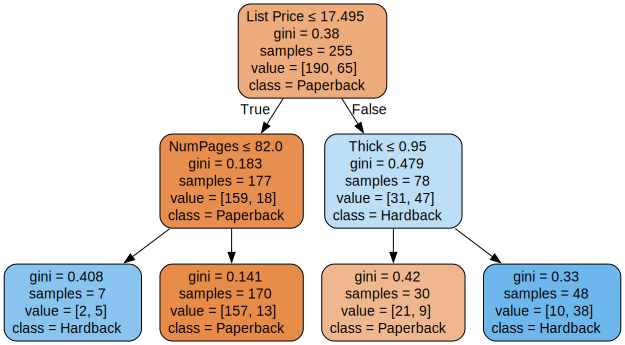

In [5]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the decision tree using Graphviz
dot_data_b = export_graphviz(clf2, out_file=None, 
                             feature_names=X_b.columns,  
                             class_names=['Paperback', 'Hardback'],  
                             filled=True, rounded=True,  
                             special_characters=True)

# Create and render the graph directly in the notebook
graph_b = graphviz.Source(dot_data_b)

# Display the tree directly in the notebook
graph_b


Metrics for clf (Decision Tree):
Sensitivity: 0.67
Specificity: 0.91
Accuracy: 0.88

Metrics for clf2 (Second Model):
Sensitivity: 0.67
Specificity: 0.95
Accuracy: 0.86


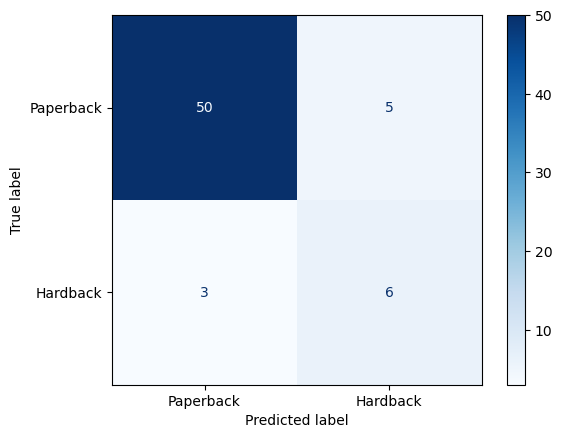

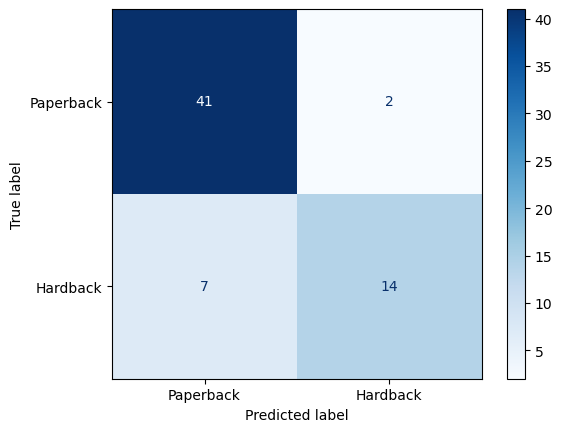

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions for both classifiers
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test_b)

# Generate confusion matrices for both classifiers
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test_b, y_pred_clf2)

# Display confusion matrices
ConfusionMatrixDisplay(cm_clf, display_labels=['Paperback', 'Hardback']).plot(cmap='Blues')
ConfusionMatrixDisplay(cm_clf2, display_labels=['Paperback', 'Hardback']).plot(cmap='Blues')

# Calculate sensitivity, specificity, and accuracy for clf
TP_clf = cm_clf[1, 1]
TN_clf = cm_clf[0, 0]
FP_clf = cm_clf[0, 1]
FN_clf = cm_clf[1, 0]

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / np.sum(cm_clf)

# Calculate sensitivity, specificity, and accuracy for clf2
TP_clf2 = cm_clf2[1, 1]
TN_clf2 = cm_clf2[0, 0]
FP_clf2 = cm_clf2[0, 1]
FN_clf2 = cm_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / np.sum(cm_clf2)

# Print the metrics for both models
print(f"Metrics for clf (Decision Tree):")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}\n")

print(f"Metrics for clf2 (Second Model):")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


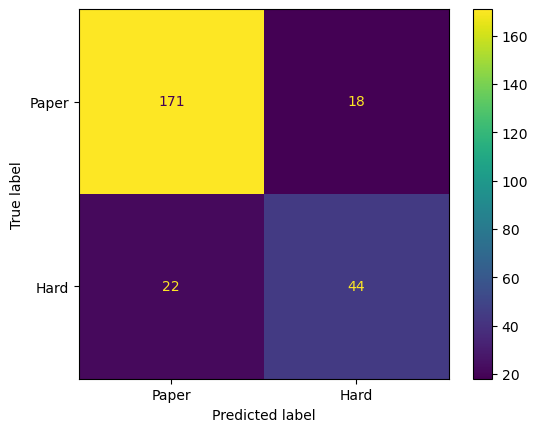

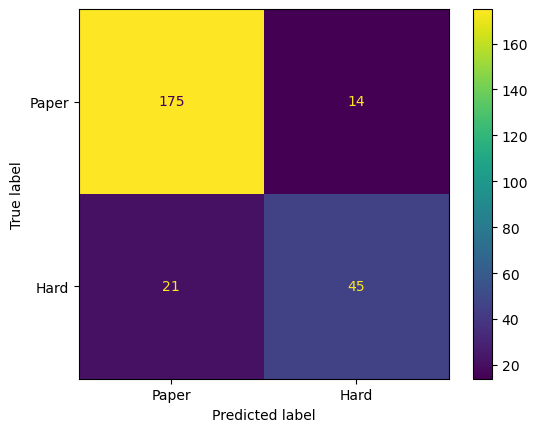

In [7]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train["Hard_or_Paper"]=="H", 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train["Hard_or_Paper"]=="H", 
                     clf2.predict(ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

The below summary was written in correspondence with ChatGPT regarding the process of understanding and creating the above code, models, and diagrams:

### Summary of Work and Discussion

#### Data Preparation & Setup:
- **Data Selection**: We worked with a dataset `ab_reduced_noNaN`, focusing on columns like `Hard_or_Paper`, `List Price`, `NumPages`, and `Thick`.
- **Target Variable**: The target variable was the classification of books as either `Hardback` or `Paperback`, stored in the `Hard_or_Paper` column, with values `H` (Hardback) and `P` (Paperback).
- **Feature Variables**: We considered features such as `List Price`, `NumPages`, and `Thick` to predict the `Hard_or_Paper` classification.
- **Data Preprocessing**: We ensured there were no missing values in the dataset (`ab_reduced_noNaN`) and prepared it for model training.

#### Decision Tree Classifiers:
- **Decision Tree Classifier Models**:
  - We created two decision tree models (`clf` and `clf2`) using `DecisionTreeClassifier` from `sklearn`.
  - `clf` was trained using only `List Price` as the feature.
  - `clf2` used a combination of `NumPages`, `Thick`, and `List Price` as the features.
  - Both models were trained using `train_test_split`, splitting the data into 80% training and 20% testing.

#### Model Evaluation:
- **Confusion Matrix**:
  - We used confusion matrices to evaluate the performance of both models (`clf` and `clf2`).
  - **Confusion Matrix Definition**: A confusion matrix is a table used to assess the performance of a classification algorithm, showing the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).
  - We used `ConfusionMatrixDisplay` to visualize the confusion matrices for both models, showing how well each model classified books as either `Paperback` or `Hardback`.

#### Key Metrics:
- **Accuracy**: For each model, we calculated the accuracy (the proportion of correct predictions).
- **Sensitivity (Recall)**: We calculated sensitivity, which is the ability of the model to correctly identify `Hardback` books (True Positives / (True Positives + False Negatives)).
- **Specificity**: Specificity was calculated to measure how well the model identified `Paperback` books (True Negatives / (True Negatives + False Positives)).

#### Model Evaluation Using Confusion Matrices:
- We compared the performance of the two models by visualizing and analyzing their confusion matrices.
- **clf**: Based on `List Price` alone.
- **clf2**: Based on `NumPages`, `Thick`, and `List Price`.
- We noted that **`clf2`** generally provided better performance due to the additional features, which could help the model make more informed predictions.

#### Visualization and Model Interpretation:
- We used **Graphviz** to visualize the decision trees for both models, which helped in understanding how the classifiers made their decisions based on feature thresholds.
  - `clf` tree was simpler, having fewer splits due to the smaller feature set (`List Price`).
  - `clf2` tree had more complexity due to the inclusion of `NumPages` and `Thick`.

#### Common Issues & Debugging:
- We encountered several issues related to:
  - **Label Encoding**: Ensuring that categorical values (e.g., "Hardback" and "Paperback") were correctly handled for model predictions.
  - **Boolean Masking**: Ensuring correct comparisons between the true labels and the predictions, especially with boolean logic (e.g., `== "H"`).
  - **Model Compatibility**: Ensuring that predictions (`clf.predict()`, `clf2.predict()`) were correctly compared with actual values and using proper labels in the confusion matrix.

#### Key Takeaways:
- **Model Performance**: We found that adding more features (`NumPages` and `Thick`) improved the model’s ability to classify books as `Hardback` or `Paperback`.
- **Visualization**: Confusion matrices and decision tree visualizations provided insights into the models' decision-making process and helped in comparing their effectiveness.
- **Metrics**: Sensitivity, specificity, and accuracy are important metrics for understanding how well the models are performing, especially for imbalanced datasets.

#### Next Steps (Possible Improvements):
- Experiment with more complex models (e.g., Random Forest, Gradient Boosting) for better performance.
- Fine-tune the decision tree parameters (e.g., `max_depth`, `min_samples_split`) to avoid overfitting or underfitting.
- Consider cross-validation to evaluate model performance on different subsets of the data.


<h1>Question 7</h1>
<h2>Difference between the Confusion Matrices</h2>

The main difference between the Confusion Matrices lie in the data set it's displaying. For the first matrices, we displayed each model's predictions based upon the Testing Set, the second matrices measure the prediction of the models based upon the testing set. It is generally better to look at the results from the Testing Set because it's purpose is to test the models on data it has never seen before, which is more relevant than the predictions on the data that it has already been fitting to. That is the entire purpose of having a seperate testing set in the first place, we know if the model is properly analysing trends by observing how it does with data it has never seen before, whereas if we rely on testing using the training set, we may mistake overfitted data as more accurate data.


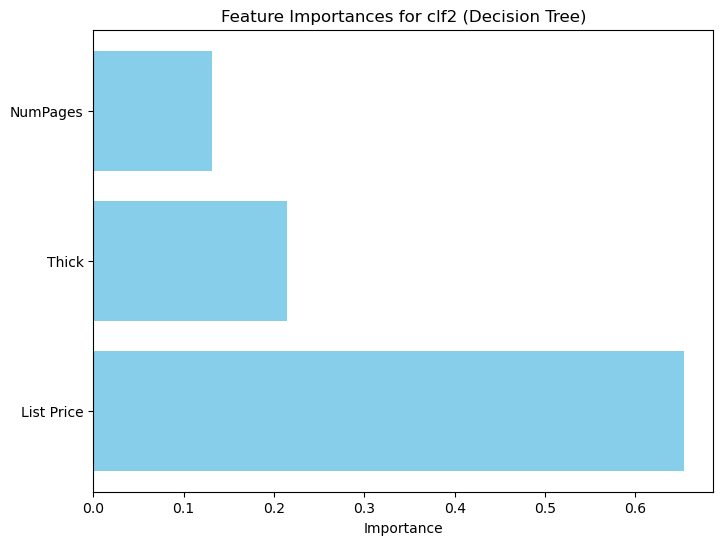

      Feature  Importance
2  List Price    0.653620
1       Thick    0.214763
0    NumPages    0.131617


In [8]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = clf2.feature_importances_

# Get feature names
feature_names = clf2.feature_names_in_

# Create a DataFrame for better visualization
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances for clf2 (Decision Tree)')
plt.show()

# Display the sorted DataFrame
print(feature_importance_df)


<h1>Question 9</h1>
<h2>Linear Coefficients vs. Feature Importances</h2>

Linear Coefficients describe a linear, numerical relationship between feature variables and target variables, while Feature Importances capture complex relationships in a more categorical way. Linear Coefficients show the magnitude of a trend while Feature Importances split off data in increasing depth. Most importantly, Linear Coefficients are seperate and do not effect one another, while Feature Importances show the Importance of certain variables above others.

<h3>All conversation regarding creating and debugging code, as well as conversing about topics regarding these stats and graphs/visualizations with ChatGPT can be found here:</h3>

https://chatgpt.com/share/673e0da7-8128-8000-8d16-9fa47d78b932